In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# 1. Data Exploration

In [2]:
df = pd.read_csv('Employee.csv')
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [3]:
df.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [4]:
df.shape

(148, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [6]:
df.columns

Index(['Company', 'Age', 'Salary', 'Place', 'Country', 'Gender'], dtype='object')

### Find Unique values

In [7]:
for column in df.columns:
    unique_value = df[column].unique()
    length = len(unique_value)
    print(f"\nFeature : {column}, Length : {length}")
    print(f"Unique Values : {unique_value}")


Feature : Company, Length : 7
Unique Values : ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']

Feature : Age, Length : 30
Unique Values : [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]

Feature : Salary, Length : 41
Unique Values : [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]

Feature : Place, Length : 12
Unique Values : ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']

Feature : Country, Length : 1
Unique Values : ['India']

Feature : Gender, Length : 2
Unique Values : [0 1]


### Perform the statistical analysis and renaming of the columns.

In [8]:
df.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [9]:
age_mean = df['Age'].mean()
age_median = df['Age'].median()
print(f"Mean and median of Age : {age_mean:.2f} and {age_median}")

Mean and median of Age : 30.48 and 32.5


In [10]:
salary_mean = df['Salary'].mean()
salary_median = df['Salary'].median()
print(f"Mean and median of Salary : {salary_mean:.2f} and {salary_median}")

Mean and median of Salary : 5312.47 and 5000.0


In [11]:
new_column_names = ['Organization', 'Employee_Age', 'Monthly_Salary', 'Location', 'Country', 'Sex']
df.columns = new_column_names
df

,Organization,Employee_Age,Monthly_Salary,Location,Country,Sex
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [12]:
df['Employee_Age'].unique()

array([20., 30., 35., 40., 23., nan, 34., 45., 18., 22., 32., 37., 50.,
       21., 46., 36., 26., 41., 24., 25., 43., 19., 38., 51., 31., 44.,
       33., 17.,  0., 54.])

# 2. Data Cleaning

In [13]:
df.isnull().sum()

Organization       8
Employee_Age      18
Monthly_Salary    24
Location          14
Country            0
Sex                0
dtype: int64

### Find the missing and inappropriate values, treat them appropriately.

In [14]:
df['Organization'] = df['Organization'].replace({'Tata Consultancy Services' : 'TCS', 'Congnizant' : 'CTS', 'Infosys Pvt Lmt' : 'Infosys'})
df['Organization'].unique()

array(['TCS', 'Infosys', 'CTS', nan], dtype=object)

In [15]:
mode_org = df['Organization'].mode()[0]
print(mode_org)
df.fillna({'Organization' : mode_org}, inplace = True)

TCS


In [16]:
df['Organization'].unique()

array(['TCS', 'Infosys', 'CTS'], dtype=object)

In [17]:
df['Monthly_Salary'] = df['Monthly_Salary'].fillna(df['Monthly_Salary'].median())

Replace the value 0 in age as NaN

In [18]:
df['Employee_Age'] = df['Employee_Age'].replace(0, np.nan)

In [19]:
df['Employee_Age'] = df['Employee_Age'].fillna(df['Employee_Age'].mean())

In [20]:
df['Employee_Age'] = df['Employee_Age'].astype(np.int64)

In [21]:
df['Employee_Age'].unique()

array([20, 30, 35, 40, 23, 31, 34, 45, 18, 22, 32, 37, 50, 21, 46, 36, 26,
       41, 24, 25, 43, 19, 38, 51, 44, 33, 17, 54])

In [22]:
company_names = df['Organization'].unique()
for company in company_names:
    company_df = df[df['Organization'] == company]
    most_common_location = company_df['Location'].value_counts().idxmax()
    df[df['Organization'] == company] = df[df['Organization'] == company].fillna(most_common_location)

In [23]:
df.isnull().sum()

Organization      0
Employee_Age      0
Monthly_Salary    0
Location          0
Country           0
Sex               0
dtype: int64

In [24]:
df[df.duplicated()]

,Organization,Employee_Age,Monthly_Salary,Location,Country,Sex
78,TCS,31,6000.0,Calcutta,India,0
84,CTS,43,5000.0,Mumbai,India,0
130,TCS,21,4824.0,Mumbai,India,0
131,Infosys,31,5835.0,Mumbai,India,0
144,Infosys,22,8787.0,Calcutta,India,1


In [25]:
df.drop_duplicates(inplace = True)

In [26]:
df

,Organization,Employee_Age,Monthly_Salary,Location,Country,Sex
0,TCS,20,5000.0,Chennai,India,0
1,Infosys,30,5000.0,Mumbai,India,0
2,TCS,35,2300.0,Calcutta,India,0
3,Infosys,40,3000.0,Delhi,India,0
4,TCS,23,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys,22,8202.0,Mumbai,India,0
143,TCS,33,9024.0,Calcutta,India,1
145,Infosys,44,4034.0,Delhi,India,1
146,TCS,33,5034.0,Mumbai,India,1


### Find the outliers.

array([[<Axes: title={'center': 'Employee_Age'}>,
        <Axes: title={'center': 'Monthly_Salary'}>],
       [<Axes: title={'center': 'Sex'}>, <Axes: >]], dtype=object)

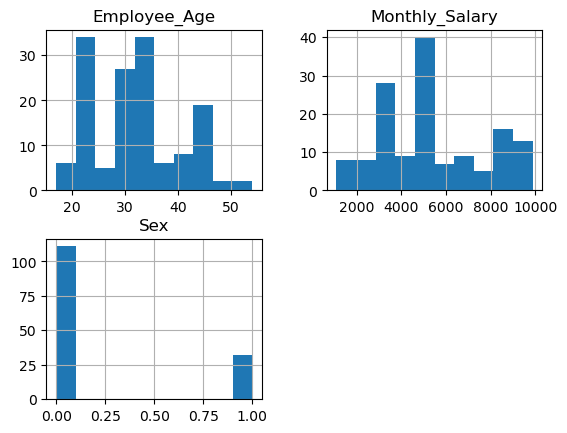

In [27]:
df.hist()

<Axes: ylabel='Employee_Age'>

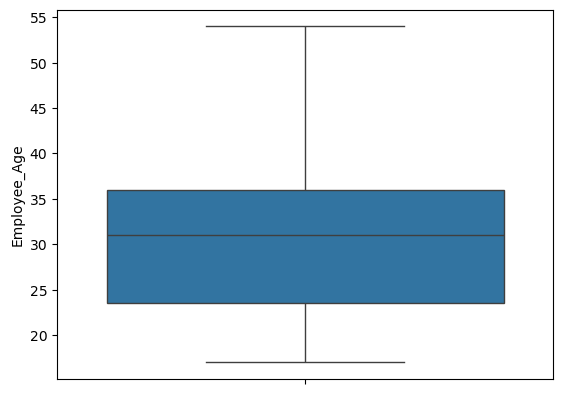

In [28]:
sns.boxplot(data = df['Employee_Age'])

<Axes: ylabel='Monthly_Salary'>

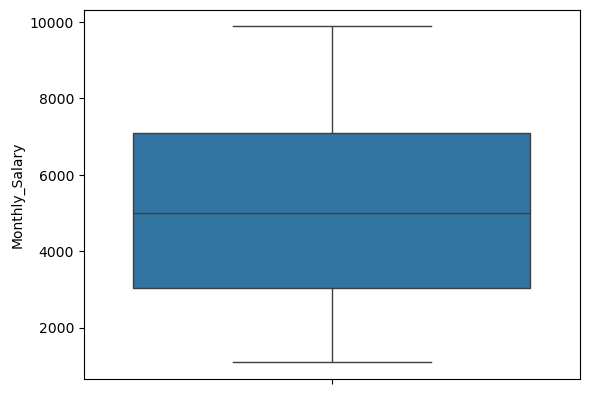

In [29]:
sns.boxplot(data = df['Monthly_Salary'])

No Outliers

# Data Analysis

Filter the data with age >40 and salary<5000

In [30]:
filter_data = df[(df['Employee_Age'] > 40) & (df['Employee_Age'] < 5000)]
filter_data

,Organization,Employee_Age,Monthly_Salary,Location,Country,Sex
9,CTS,45,9000.0,Delhi,India,0
12,CTS,45,5000.0,Chennai,India,0
21,Infosys,50,3184.0,Delhi,India,0
27,CTS,45,9284.0,Delhi,India,1
30,CTS,46,7654.0,Chennai,India,0
32,Infosys,45,4034.0,Calcutta,India,0
39,Infosys,41,3000.0,Mumbai,India,0
45,CTS,46,9000.0,Hyderabad,India,1
48,CTS,43,5000.0,Mumbai,India,0
50,Infosys,41,3000.0,Chennai,India,0


Plot the chart with age and salary

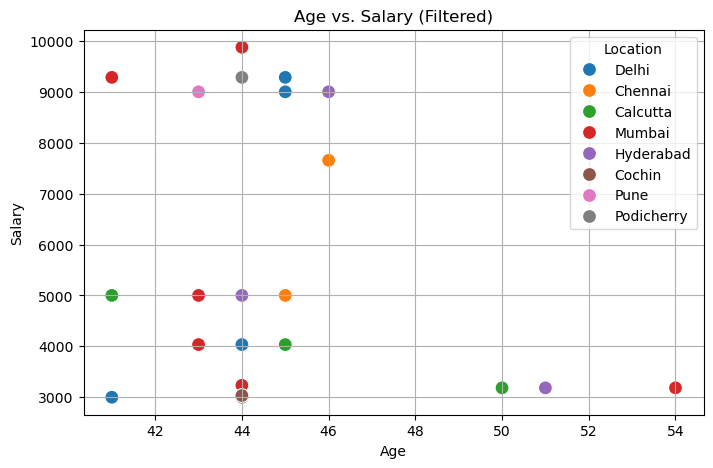

In [31]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Employee_Age', y='Monthly_Salary', data=filter_data, hue = 'Location', s=100)
plt.title('Age vs. Salary (Filtered)')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

Count the number of people from each place and represent it visually

In [32]:
people_count = filter_data['Location'].value_counts()
people_count

Location
Mumbai        8
Delhi         6
Hyderabad     4
Chennai       3
Calcutta      3
Cochin        2
Pune          1
Podicherry    1
Name: count, dtype: int64

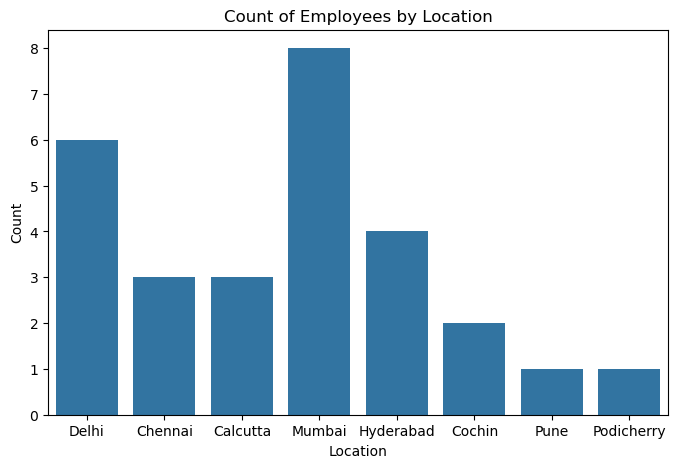

In [33]:
plt.figure(figsize = (8, 5))
sns.countplot(x = 'Location', data = filter_data)
plt.title("Count of Employees by Location")
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

# Data Encoding

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, 0 to 147
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Organization    143 non-null    object 
 1   Employee_Age    143 non-null    int64  
 2   Monthly_Salary  143 non-null    float64
 3   Location        143 non-null    object 
 4   Country         143 non-null    object 
 5   Sex             143 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 7.8+ KB


### One-Hot Encoding

In [35]:
df['Country'].unique()

array(['India'], dtype=object)

In [36]:
country_encoded = pd.get_dummies(df['Country'], dtype = int)
country_encoded

,India
0,1
1,1
2,1
3,1
4,1
...,...
142,1
143,1
145,1
146,1


In [37]:
df = pd.concat([df, country_encoded], axis = 1)

In [38]:
df.drop('Country', axis = 1, inplace = True)

In [39]:
df

,Organization,Employee_Age,Monthly_Salary,Location,Sex,India
0,TCS,20,5000.0,Chennai,0,1
1,Infosys,30,5000.0,Mumbai,0,1
2,TCS,35,2300.0,Calcutta,0,1
3,Infosys,40,3000.0,Delhi,0,1
4,TCS,23,4000.0,Mumbai,0,1
...,...,...,...,...,...,...
142,Infosys,22,8202.0,Mumbai,0,1
143,TCS,33,9024.0,Calcutta,1,1
145,Infosys,44,4034.0,Delhi,1,1
146,TCS,33,5034.0,Mumbai,1,1


### Label Encoding

In [40]:
df['Organization'].unique()

array(['TCS', 'Infosys', 'CTS'], dtype=object)

In [41]:
le = LabelEncoder()

In [42]:
df['Organization'] = le.fit_transform(df['Organization'])

In [43]:
df

,Organization,Employee_Age,Monthly_Salary,Location,Sex,India
0,2,20,5000.0,Chennai,0,1
1,1,30,5000.0,Mumbai,0,1
2,2,35,2300.0,Calcutta,0,1
3,1,40,3000.0,Delhi,0,1
4,2,23,4000.0,Mumbai,0,1
...,...,...,...,...,...,...
142,1,22,8202.0,Mumbai,0,1
143,2,33,9024.0,Calcutta,1,1
145,1,44,4034.0,Delhi,1,1
146,2,33,5034.0,Mumbai,1,1


In [44]:
df['Organization'].unique()

array([2, 1, 0])

In [45]:
df['Location'].unique()

array(['Chennai', 'Mumbai', 'Calcutta', 'Delhi', 'Podicherry', 'Cochin',
       'Noida', 'Hyderabad', 'Bhopal', 'Nagpur', 'Pune'], dtype=object)

In [46]:
df['Location'] = le.fit_transform(df['Location'])
df

,Organization,Employee_Age,Monthly_Salary,Location,Sex,India
0,2,20,5000.0,2,0,1
1,1,30,5000.0,6,0,1
2,2,35,2300.0,1,0,1
3,1,40,3000.0,4,0,1
4,2,23,4000.0,6,0,1
...,...,...,...,...,...,...
142,1,22,8202.0,6,0,1
143,2,33,9024.0,1,1,1
145,1,44,4034.0,4,1,1
146,2,33,5034.0,6,1,1


# Feature Scaling

In [47]:
minmax_scaler = MinMaxScaler()

In [48]:
x = df.drop('Monthly_Salary', axis = 1)
y = df['Monthly_Salary']

In [49]:
x

,Organization,Employee_Age,Location,Sex,India
0,2,20,2,0,1
1,1,30,6,0,1
2,2,35,1,0,1
3,1,40,4,0,1
4,2,23,6,0,1
...,...,...,...,...,...
142,1,22,6,0,1
143,2,33,1,1,1
145,1,44,4,1,1
146,2,33,6,1,1


In [50]:
y

0      5000.0
1      5000.0
2      2300.0
3      3000.0
4      4000.0
        ...  
142    8202.0
143    9024.0
145    4034.0
146    5034.0
147    8202.0
Name: Monthly_Salary, Length: 143, dtype: float64

In [51]:
x = minmax_scaler.fit_transform(x)

In [52]:
x

array([[1.        , 0.08108108, 0.2       , 0.        , 0.        ],
       [0.5       , 0.35135135, 0.6       , 0.        , 0.        ],
       [1.        , 0.48648649, 0.1       , 0.        , 0.        ],
       [0.5       , 0.62162162, 0.4       , 0.        , 0.        ],
       [1.        , 0.16216216, 0.6       , 0.        , 0.        ],
       [0.5       , 0.37837838, 0.1       , 0.        , 0.        ],
       [1.        , 0.37837838, 0.2       , 1.        , 0.        ],
       [0.5       , 0.16216216, 0.6       , 1.        , 0.        ],
       [1.        , 0.45945946, 0.1       , 1.        , 0.        ],
       [0.        , 0.75675676, 0.4       , 0.        , 0.        ],
       [0.        , 0.16216216, 0.6       , 0.        , 0.        ],
       [0.        , 0.45945946, 0.1       , 0.        , 0.        ],
       [0.        , 0.75675676, 0.2       , 0.        , 0.        ],
       [0.        , 0.02702703, 0.6       , 0.        , 0.        ],
       [0.5       , 0.62162162, 0.

In [53]:
# Coverting to Dataframe
x=pd.DataFrame(x)
x.describe()

,0,1,2,3,4
count,143.000000,143.000000,143.000000,143.000000,143.0
mean,0.583916,0.402192,0.391608,0.223776,0.0
std,0.406748,0.223573,0.249929,0.418239,0.0
min,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.175676,0.100000,0.000000,0.0
50%,0.500000,0.378378,0.400000,0.000000,0.0
75%,1.000000,0.513514,0.600000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,0.0


In [54]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [55]:
x

array([[ 1.0265489 , -1.44131773, -0.76934732, -0.53692484,  0.        ],
       [-0.20703507, -0.22820157,  0.83673541, -0.53692484,  0.        ],
       [ 1.0265489 ,  0.37835651, -1.170868  , -0.53692484,  0.        ],
       [-0.20703507,  0.98491458,  0.03369404, -0.53692484,  0.        ],
       [ 1.0265489 , -1.07738288,  0.83673541, -0.53692484,  0.        ],
       [-0.20703507, -0.10688995, -1.170868  , -0.53692484,  0.        ],
       [ 1.0265489 , -0.10688995, -0.76934732,  1.86245805,  0.        ],
       [-0.20703507, -1.07738288,  0.83673541,  1.86245805,  0.        ],
       [ 1.0265489 ,  0.25704489, -1.170868  ,  1.86245805,  0.        ],
       [-1.44061905,  1.59147266,  0.03369404, -0.53692484,  0.        ],
       [-1.44061905, -1.07738288,  0.83673541, -0.53692484,  0.        ],
       [-1.44061905,  0.25704489, -1.170868  , -0.53692484,  0.        ],
       [-1.44061905,  1.59147266, -0.76934732, -0.53692484,  0.        ],
       [-1.44061905, -1.68394096,  0.8

In [56]:
x = pd.DataFrame(x)

In [57]:
x.head()

,0,1,2,3,4
0,1.026549,-1.441318,-0.769347,-0.536925,0.0
1,-0.207035,-0.228202,0.836735,-0.536925,0.0
2,1.026549,0.378357,-1.170868,-0.536925,0.0
3,-0.207035,0.984915,0.033694,-0.536925,0.0
4,1.026549,-1.077383,0.836735,-0.536925,0.0
